## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:


# 1. Import libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

import warnings
warnings.filterwarnings('ignore')

# 2. Obtain Data

In [122]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 3. Scrub and Clean Data

### Check Data Types

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [124]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

### Check for Erroneous Values (i.e. ?)

In [125]:
# sqft_basement includes 454 instances of '?'
sum(df['sqft_basement'] =='?')

454

In [126]:
# Verify that instances are dropped
sum(df['sqft_basement'] =='?')

454

In [127]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  object 
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

### Check for Null Values

In [128]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [129]:
# Check waterfront
df['waterfront'].value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [130]:
# Fill NaNs with median (which is 0, the majority of the data)
df['waterfront'].fillna(df['waterfront'].median(), inplace = True)

In [131]:
# Double-check waterfront
df['waterfront'].isna().sum()

0

In [132]:
# Check view
df['view'].value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [133]:
# Drop NaNs (61, small percentage of data)
df.dropna(subset = ['view'], inplace = True)

In [134]:
# Double-check view
df['view'].isna().sum()

0

In [135]:
# Check yr_renovated
df['yr_renovated'].value_counts()

0.0       16618
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [136]:
# Drop yr_renovated column (large percentage is either 0 (16618) or NaNs (3754))
df.drop('yr_renovated', axis = 1, inplace = True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     21082 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21082 non-null  int64  
 11  grade          21082 non-null  int64  
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  object 
 14  yr_built       21082 non-null  int64  
 15  zipcode        21082 non-null  int64  
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

### Numeric Data Encoded as Strings
- sqft_basement

In [138]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     21082 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21082 non-null  int64  
 11  grade          21082 non-null  int64  
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  float64
 14  yr_built       21082 non-null  int64  
 15  zipcode        21082 non-null  int64  
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

### Categorical Data Encoded as Integers
- waterfront, view, zipcode, condition, and grade

In [140]:
convert_to_str = ['waterfront', 'view', 'zipcode', 'condition', 'grade']

for col in convert_to_str:
    df[col] = df[col].astype('str')        

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     21082 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21082 non-null  object 
 11  grade          21082 non-null  object 
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  float64
 14  yr_built       21082 non-null  int64  
 15  zipcode        21082 non-null  object 
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

## Get rid of unecessary features

In [142]:
df.drop(columns=['id', 'date', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   bedrooms       21082 non-null  int64  
 2   bathrooms      21082 non-null  float64
 3   sqft_living    21082 non-null  int64  
 4   sqft_lot       21082 non-null  int64  
 5   floors         21082 non-null  float64
 6   waterfront     21082 non-null  object 
 7   view           21082 non-null  object 
 8   condition      21082 non-null  object 
 9   grade          21082 non-null  object 
 10  sqft_above     21082 non-null  int64  
 11  sqft_basement  21082 non-null  float64
 12  yr_built       21082 non-null  int64  
 13  zipcode        21082 non-null  object 
 14  lat            21082 non-null  float64
 15  long           21082 non-null  float64
dtypes: float64(6), int64(5), object(5)
memory usage: 2.7+ MB


## Explore Data

In [144]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,1789.000000,291.359975,1971.023337,47.560371,-122.213843
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,828.369355,442.007858,29.323120,0.138568,0.140607
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,370.000000,0.000000,1900.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,1200.000000,0.000000,1952.000000,47.471325,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,1560.000000,0.000000,1975.000000,47.572200,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,2210.000000,560.000000,1997.000000,47.678200,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000


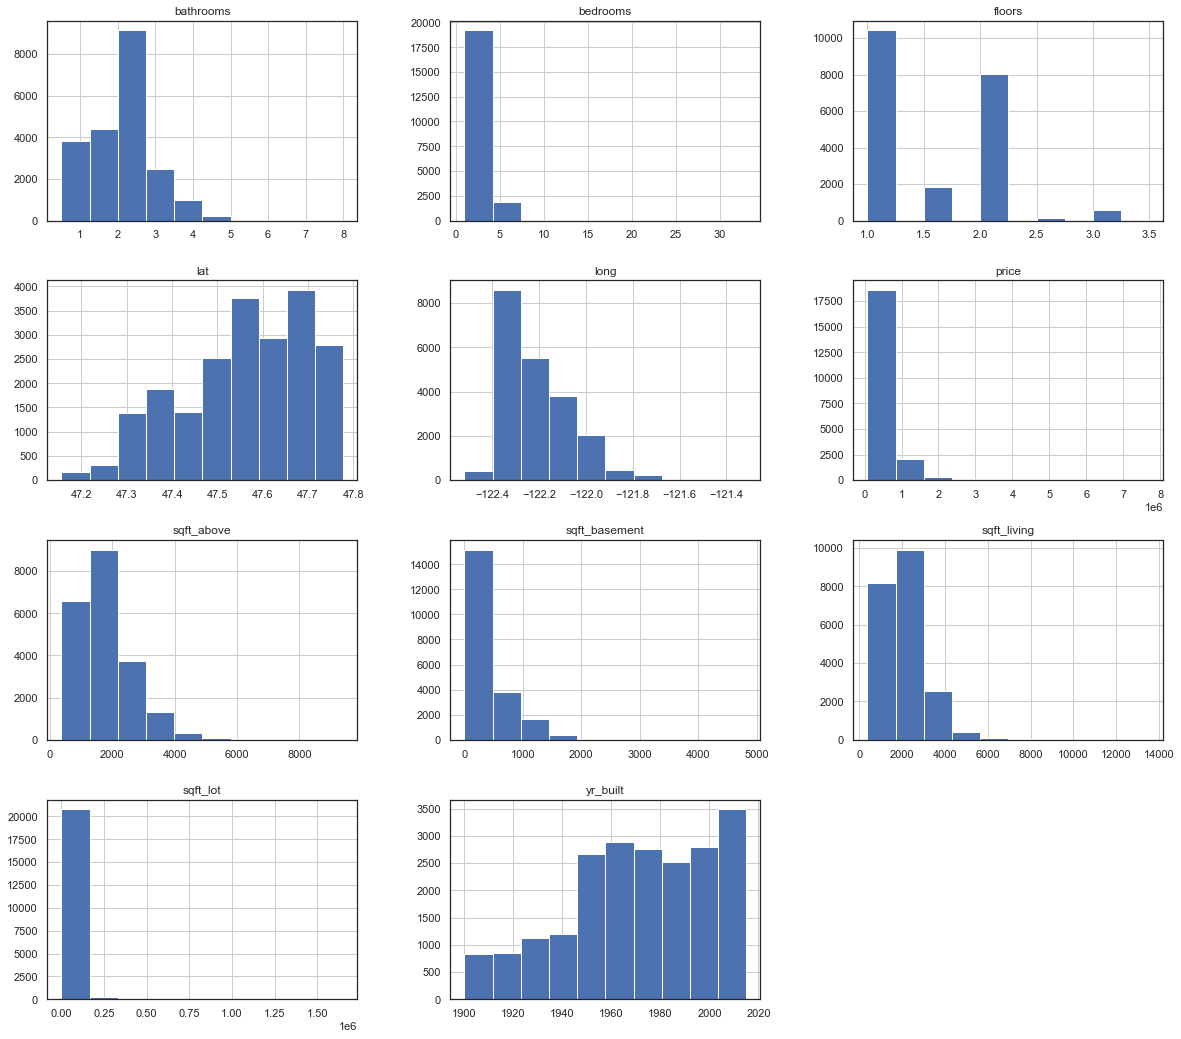

In [145]:
df.hist(figsize = (20,18));

Note how skewed most of these distributions are. While linear regression does not assume that each of the individual predictors are normally distributed, it does assume a linear relationship between the predictors and the target variable

### Check for Linearity

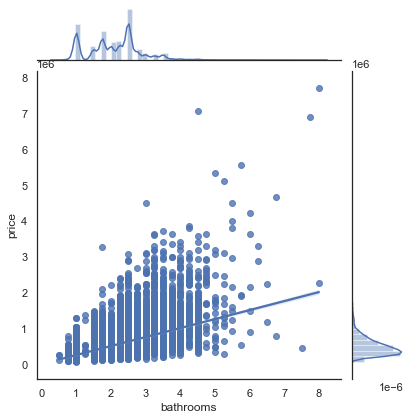

In [146]:
sns.jointplot('bathrooms','price', data=df, kind='reg');

In [147]:
# Comment: There seems to be a some-what linear correlation between num_reviews and list_price
# Though the relationship is noisy

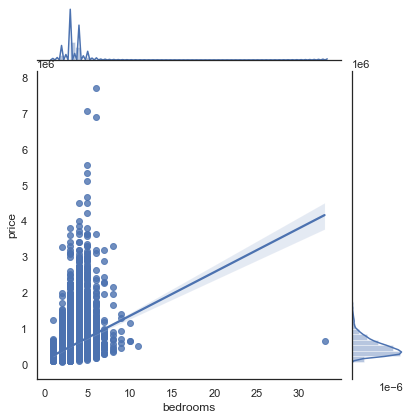

In [148]:
sns.jointplot('bedrooms','price', data=df, kind='reg');

In [149]:
# Not much of a linear relationship

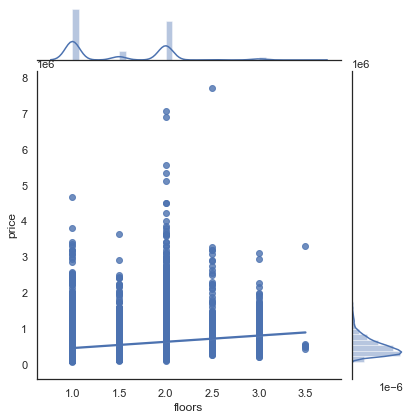

In [150]:
sns.jointplot('floors','price', data=df, kind='reg');

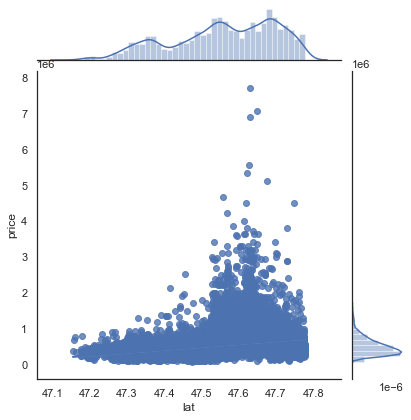

In [151]:
sns.jointplot('lat','price', data=df, kind='reg');

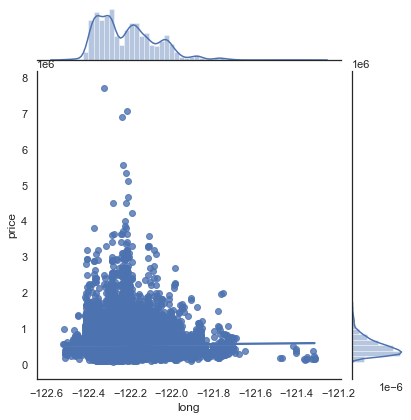

In [152]:
sns.jointplot('long','price', data=df, kind='reg');

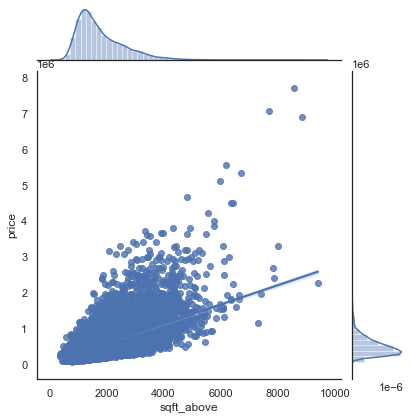

In [153]:
sns.jointplot('sqft_above','price', data=df, kind='reg');

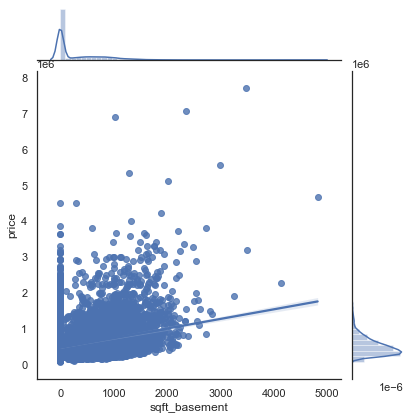

In [154]:
sns.jointplot('sqft_basement','price', data=df, kind='reg');

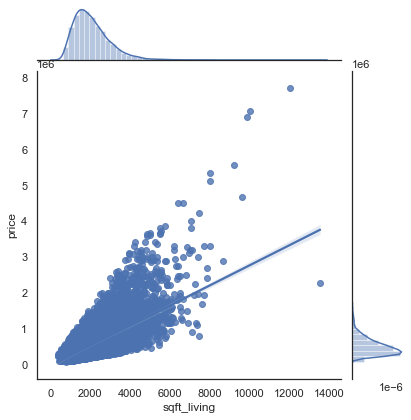

In [155]:
sns.jointplot('sqft_living','price', data=df, kind='reg');

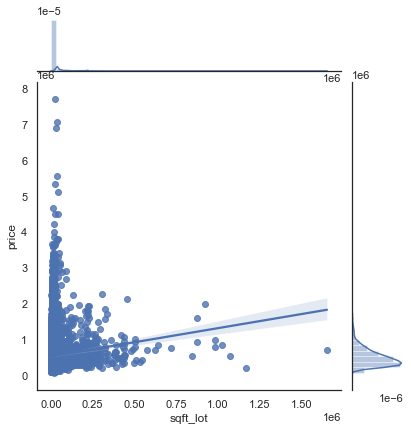

In [156]:
sns.jointplot('sqft_lot','price', data=df, kind='reg');

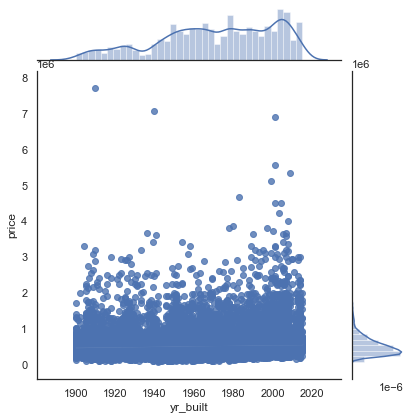

In [157]:
sns.jointplot('yr_built','price', data=df, kind='reg');

## Check for Multicollinearity

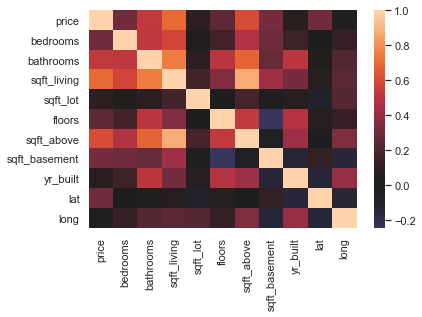

In [158]:
sns.heatmap(df.corr(), center=0);

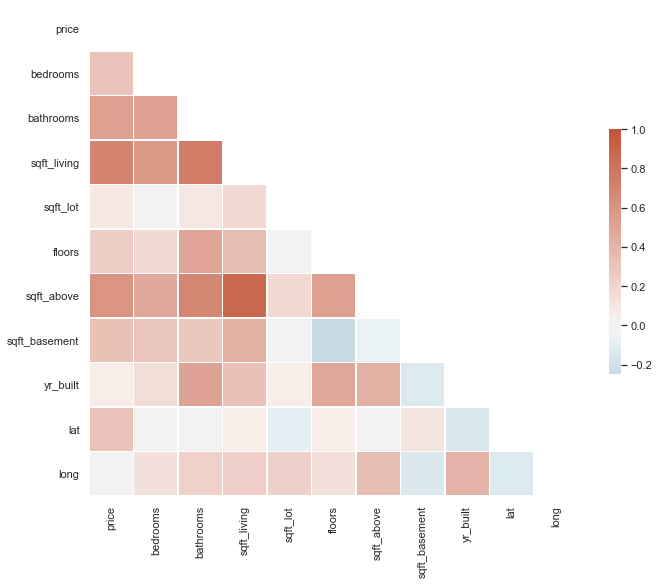

In [159]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [160]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
price,1.000000,0.308454,0.525029,0.702004,0.088400,0.256603,0.605481,0.323018,0.054849,0.307667,0.022512
bedrooms,0.308454,1.000000,0.513694,0.577696,0.032531,0.178518,0.478967,0.301987,0.156820,-0.009939,0.131398
bathrooms,0.525029,0.513694,1.000000,0.754793,0.088451,0.503796,0.685959,0.281813,0.508866,0.025243,0.224660
sqft_living,0.702004,0.577696,0.754793,1.000000,0.173266,0.354260,0.876787,0.433369,0.319584,0.053213,0.241473
sqft_lot,0.088400,0.032531,0.088451,0.173266,1.000000,-0.007745,0.183653,0.015612,0.052469,-0.085076,0.230489
floors,0.256603,0.178518,0.503796,0.354260,-0.007745,1.000000,0.523594,-0.245628,0.489898,0.049237,0.125360
sqft_above,0.605481,0.478967,0.685959,0.876787,0.183653,0.523594,1.000000,-0.053403,0.425170,-0.000014,0.344774
sqft_basement,0.323018,0.301987,0.281813,0.433369,0.015612,-0.245628,-0.053403,1.000000,-0.133178,0.110526,-0.144709
yr_built,0.054849,0.156820,0.508866,0.319584,0.052469,0.489898,0.425170,-0.133178,1.000000,-0.148165,0.409009
lat,0.307667,-0.009939,0.025243,0.053213,-0.085076,0.049237,-0.000014,0.110526,-0.148165,1.000000,-0.135173


In [161]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False
lat,False,False,False,False,False,False,False,False,False,True,False


In [162]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [163]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876787
"(sqft_living, bathrooms)",0.754793


In [164]:
# Drop sqft_living as it is highly correlated to sqft_above and bathrooms
df.drop('sqft_living', axis = 1, inplace = True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   bedrooms       21082 non-null  int64  
 2   bathrooms      21082 non-null  float64
 3   sqft_lot       21082 non-null  int64  
 4   floors         21082 non-null  float64
 5   waterfront     21082 non-null  object 
 6   view           21082 non-null  object 
 7   condition      21082 non-null  object 
 8   grade          21082 non-null  object 
 9   sqft_above     21082 non-null  int64  
 10  sqft_basement  21082 non-null  float64
 11  yr_built       21082 non-null  int64  
 12  zipcode        21082 non-null  object 
 13  lat            21082 non-null  float64
 14  long           21082 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 2.6+ MB


## Normalize Data

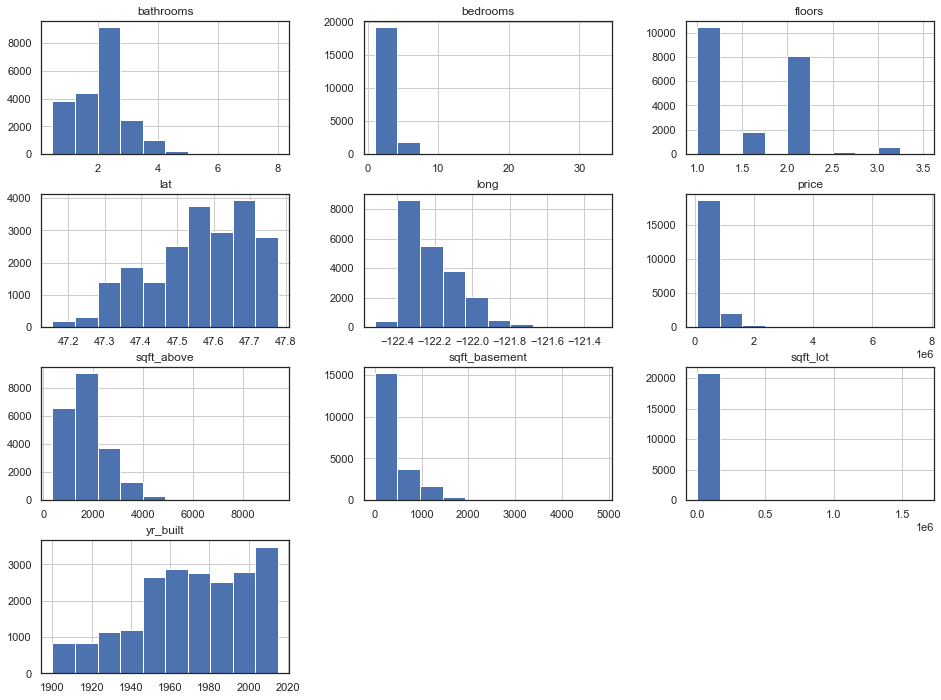

In [166]:
df.hist(figsize=(16,12));

In [167]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature you will be predicting
cont_data = ['bathrooms', 'bedrooms', 'floors', 'lat', 'sqft_above', 'sqft_lot', 'yr_built']
for var in cont_data:
    df[var]= np.log(df[var])
df.describe()

#(Also remember that you can't take the logarithm of zero nor a negative number.)
#will not work on log negatives and sqft_basement due to 0s

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
count,2.108200e+04,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,1.177712,0.677803,8.990663,0.338189,7.395389,291.359975,7.586197,3.861996,-122.213843
std,3.667323e+05,0.282684,0.392118,0.901414,0.352171,0.427009,442.007858,0.014932,0.002916,0.140607
min,7.800000e+04,0.000000,-0.693147,6.253829,0.000000,5.913503,0.000000,7.549609,3.853459,-122.519000
25%,3.220000e+05,1.098612,0.559616,8.525161,0.000000,7.090077,0.000000,7.576610,3.860126,-122.328000
50%,4.500000e+05,1.098612,0.810930,8.938532,0.405465,7.352441,0.000000,7.588324,3.862249,-122.230000
75%,6.450000e+05,1.386294,0.916291,9.277789,0.693147,7.700748,560.000000,7.599401,3.864474,-122.125000
max,7.700000e+06,3.496508,2.079442,14.317109,1.252763,9.149528,4820.000000,7.608374,3.866557,-121.315000


In [168]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data  𝑚𝑜𝑟𝑒  normal, it will just change the mean and the standard error!
for item in cont_data:
    df[item] = (df[item] - df[item].mean()) / df[item].std()

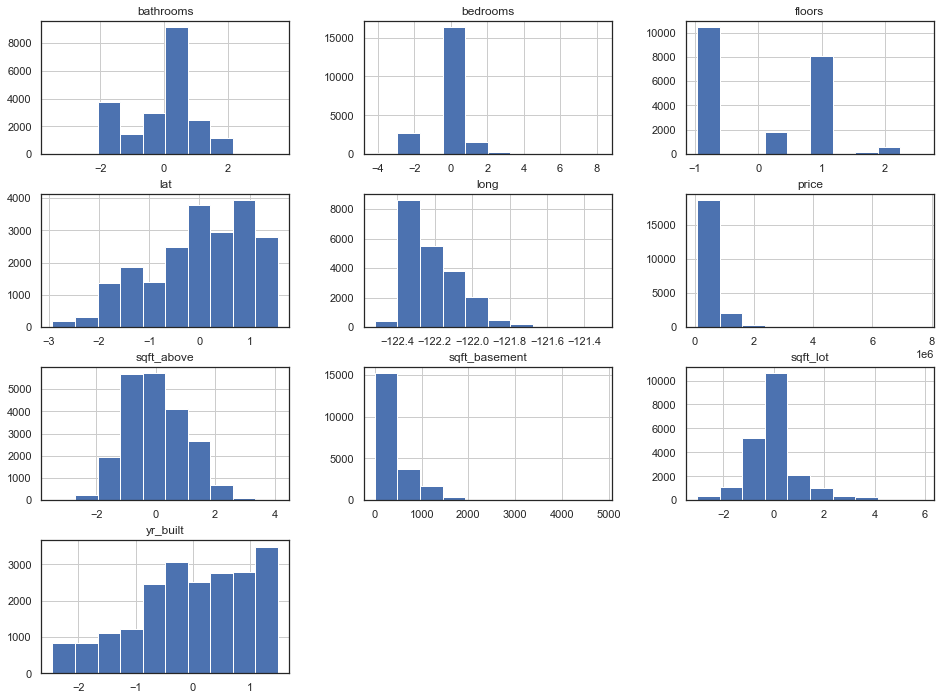

In [169]:
df.hist(figsize=(16,12));

In [170]:
# One-hot encode categorical data
df = pd.get_dummies(df, drop_first = True) 
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.279815,-1.728568,-0.389668,-0.960295,-0.754362,0.0,-0.539199,-0.353321,-122.257,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,-0.279815,0.339508,-0.114277,1.007914,0.672337,400.0,-0.676360,1.157882,-122.319,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.714154,-1.728568,0.243703,-0.960295,-1.754058,0.0,-1.297086,1.279324,-122.233,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.737865,1.073170,-0.525253,-0.960295,-1.027715,910.0,-0.197520,-0.284026,-122.393,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.279815,0.039132,0.007193,-0.960295,0.072974,0.0,0.548094,0.408155,-122.045,...,0,0,0,0,0,0,0,0,0,0


In [171]:
for col in df.columns: 
    print(col) 

price
bedrooms
bathrooms
sqft_lot
floors
sqft_above
sqft_basement
yr_built
lat
long
waterfront_1.0
view_1.0
view_2.0
view_3.0
view_4.0
condition_2
condition_3
condition_4
condition_5
grade_11
grade_12
grade_13
grade_3
grade_4
grade_5
grade_6
grade_7
grade_8
grade_9
zipcode_98002
zipcode_98003
zipcode_98004
zipcode_98005
zipcode_98006
zipcode_98007
zipcode_98008
zipcode_98010
zipcode_98011
zipcode_98014
zipcode_98019
zipcode_98022
zipcode_98023
zipcode_98024
zipcode_98027
zipcode_98028
zipcode_98029
zipcode_98030
zipcode_98031
zipcode_98032
zipcode_98033
zipcode_98034
zipcode_98038
zipcode_98039
zipcode_98040
zipcode_98042
zipcode_98045
zipcode_98052
zipcode_98053
zipcode_98055
zipcode_98056
zipcode_98058
zipcode_98059
zipcode_98065
zipcode_98070
zipcode_98072
zipcode_98074
zipcode_98075
zipcode_98077
zipcode_98092
zipcode_98102
zipcode_98103
zipcode_98105
zipcode_98106
zipcode_98107
zipcode_98108
zipcode_98109
zipcode_98112
zipcode_98115
zipcode_98116
zipcode_98117
zipcode_98118
zipcod

In [172]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,21082.000000,2.108200e+04,2.108200e+04,21082.000000,...,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,2.485392e-13,-2.282493e-13,-4.924482e-14,-1.180081e-13,2.384871e-13,291.359975,3.345576e-11,-3.366850e-12,-122.213843,...,0.013187,0.002609,0.020634,0.011764,0.012380,0.011906,0.012238,0.006214,0.012807,0.014847
std,3.667323e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,442.007858,1.000000e+00,1.000000e+00,0.140607,...,0.114076,0.051012,0.142158,0.107823,0.110578,0.108465,0.109949,0.078584,0.112444,0.120942
min,7.800000e+04,-4.166173e+00,-3.496268e+00,-3.036158e+00,-9.602954e-01,-3.470388e+00,0.000000,-2.450246e+00,-2.927854e+00,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,-2.798151e-01,-3.014067e-01,-5.164131e-01,-9.602954e-01,-7.150016e-01,0.000000,-6.420433e-01,-6.412973e-01,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,-2.798151e-01,3.395084e-01,-5.783302e-02,1.910334e-01,-1.005779e-01,0.000000,1.424252e-01,8.675308e-02,-122.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,7.378647e-01,6.082042e-01,3.185282e-01,1.007914e+00,7.151120e-01,560.000000,8.842844e-01,8.501308e-01,-122.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,8.202777e+00,3.574532e+00,5.908993e+00,2.596958e+00,4.107971e+00,4820.000000,1.485206e+00,1.564437e+00,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Explore Data

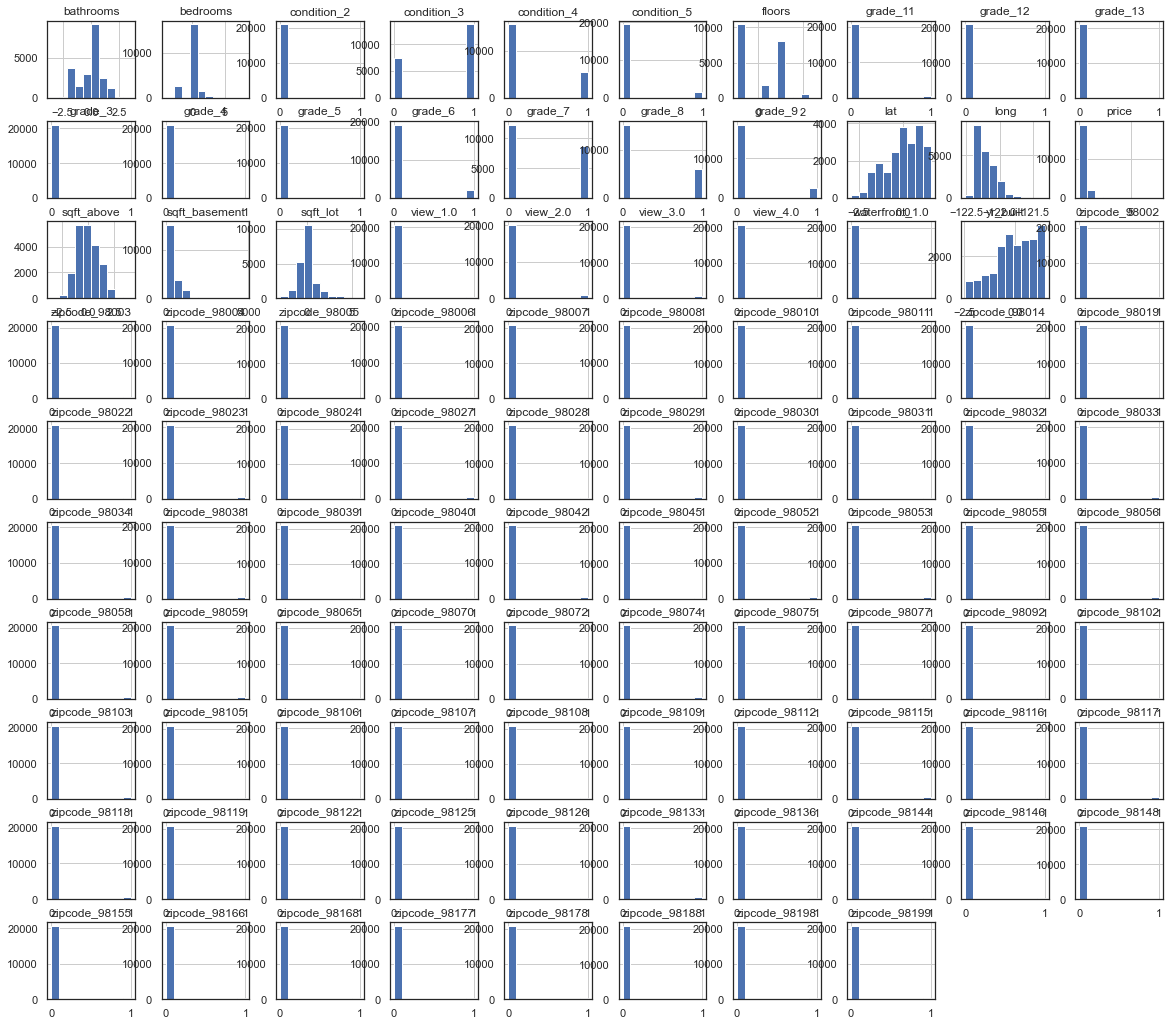

In [173]:
df.hist(figsize = (20,18));

## Model

In [174]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [175]:
df.columns = [col_formatting(col) for col in df.columns]

In [176]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'waterfront_10',
 'view_10',
 'view_20',
 'view_30',
 'view_40',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_9

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 98 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   bedrooms       21082 non-null  float64
 2   bathrooms      21082 non-null  float64
 3   sqft_lot       21082 non-null  float64
 4   floors         21082 non-null  float64
 5   sqft_above     21082 non-null  float64
 6   sqft_basement  21082 non-null  float64
 7   yr_built       21082 non-null  float64
 8   lat            21082 non-null  float64
 9   long           21082 non-null  float64
 10  waterfront_10  21082 non-null  uint8  
 11  view_10        21082 non-null  uint8  
 12  view_20        21082 non-null  uint8  
 13  view_30        21082 non-null  uint8  
 14  view_40        21082 non-null  uint8  
 15  condition_2    21082 non-null  uint8  
 16  condition_3    21082 non-null  uint8  
 17  condition_4    21082 non-null  uint8  
 18  condit

## 5. Build an Initial Regression Model

In [178]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [179]:
train, test = train_test_split(df)

In [180]:
print(len(train), len(test))
train.head()

15811 5271


,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2360,278000.0,-0.279815,-1.728568,-0.056087,-0.960295,-1.495183,0.0,-1.748994,-0.706509,-122.345,...,0,0,0,1,0,0,0,0,0,0
7654,670000.0,-0.279815,-0.301407,-0.368278,-0.960295,-0.600741,900.0,-0.573463,-0.184439,-122.391,...,0,0,0,0,0,0,0,0,0,0
21347,410000.0,0.737865,0.339508,-0.748117,1.007914,0.286018,670.0,1.385426,1.254895,-121.967,...,0,0,0,0,0,0,0,0,0,0
6105,247200.0,-0.279815,-0.301407,0.091630,-0.960295,-0.404729,0.0,0.379364,-1.400221,-122.087,...,0,0,0,0,0,0,0,0,0,0
6825,350000.0,0.737865,1.073170,0.774294,-0.960295,0.838940,1050.0,-0.402318,-0.072618,-122.261,...,0,0,0,0,0,0,0,0,0,0


In [181]:
test.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
7602,560000.0,-0.279815,-0.694530,-0.167943,-0.960295,0.100688,1090.0,-0.539199,1.242680,-122.288,...,0,0,0,0,0,0,0,0,0,0
18610,588000.0,0.737865,0.339508,-0.098761,1.007914,1.077627,0.0,0.210208,0.032676,-122.090,...,0,0,0,0,0,0,0,0,0,0
13475,200000.0,0.737865,0.608204,0.081276,1.007914,0.128079,0.0,0.783604,-2.096065,-122.313,...,0,0,0,0,0,0,0,0,0,0
14315,920000.0,-0.279815,-1.728568,0.204869,-0.960295,-1.237575,450.0,-0.607744,0.542104,-122.208,...,0,0,0,0,0,0,0,0,0,0
12302,215000.0,1.527239,-0.694530,-0.009685,0.191033,0.457750,0.0,-0.299840,-0.744089,-122.170,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     773.8
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:00   Log-Likelihood:            -2.1121e+05
No. Observations:               15811   AIC:                         4.226e+05
Df Residuals:                   15713   BIC:                         4.234e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.677e+07   6.36e+06     -4.207      0.000   -3.92e+07   -1.43e+07
bedrooms      -1.076e+04   1694.703     -6.348      0.000   -1.41e+04   -7435.831
bathrooms      1.036e+04   2231.923      4.642      0.000    5985.022    1.47e+04
sqft_lot       2.271e+04   1878.387     12.092      0.000     1.9e+04    2.64e+04
floors        -7898.5081   2038.047     -3.876      0.000   -1.19e+04   -3903.702
sqft_above     1.218e+05   2840.358     42.866      0.000    1.16e+05    1.27e+05
sqft_basement   113.1842      3.904     28.992      0.000     105.532     120.837
yr_built      -4828.0742   2091.268     -2.309      0.021   -8927.200    -728.949
lat            2.623e+04   9792.962      2.678      0.007    7029.751    4.54e+04
long          -2.226e+05    5.2e+04     -4.278      0.000   -3.25e+05   -1.21e+05
waterfront_10  6.078e+05   1.83e+04     33.274      0.000    5.72e+05    6.44e+05
view_10        9.748e+04   1.03e+04      9.440      0.000    7.72e+04    1.18e+05
view_20        7.599e+04   6300.347     12.060      0.000    6.36e+04    8.83e+04
view_30        1.483e+05   8589.126     17.266      0.000    1.31e+05    1.65e+05
view_40        3.177e+05   1.25e+04     25.500      0.000    2.93e+05    3.42e+05
condition_2    9.282e+04   3.27e+04      2.838      0.005    2.87e+04    1.57e+05
condition_3    1.011e+05   3.01e+04      3.358      0.001    4.21e+04     1.6e+05
condition_4    1.166e+05   3.01e+04      3.869      0.000    5.75e+04    1.76e+05
condition_5    1.639e+05   3.04e+04      5.401      0.000    1.04e+05    2.23e+05
grade_11       2.569e+05   1.07e+04     24.027      0.000    2.36e+05    2.78e+05
grade_12       7.097e+05   2.01e+04     35.344      0.000     6.7e+05    7.49e+05
grade_13       2.413e+06   5.24e+04     46.025      0.000    2.31e+06    2.52e+06
grade_3       -5640.2273   1.55e+05     -0.036      0.971   -3.09e+05    2.98e+05
grade_4       -1.648e+05   3.61e+04     -4.560      0.000   -2.36e+05   -9.39e+04
grade_5       -2.346e+05   1.51e+04    -15.547      0.000   -2.64e+05   -2.05e+05
grade_6       -2.573e+05   9504.238    -27.067      0.000   -2.76e+05   -2.39e+05
grade_7       -2.736e+05   7543.543    -36.276      0.000   -2.88e+05   -2.59e+05
grade_8       -2.496e+05   6707.466    -37.207      0.000   -2.63e+05   -2.36e+05
grade_9       -1.516e+05   6662.631    -22.748      0.000   -1.65e+05   -1.39e+05
zipcode_98002   2.64e+04   1.63e+04      1.618      0.106   -5582.584    5.84e+04
zipcode_98003 -1.164e+04   1.44e+04     -0.807      0.420   -3.99e+04    1.66e+04
zipcode_98004  7.612e+05   2.64e+04     28.872      0.000     7.1e+05    8.13e+05
zipcode_98005  2.811e+05   2.82e+04      9.979      0.000    2.26e+05    3.36e+05
zipcode_98006  2.305e+05   2.32e+04      9.949      0.000    1.85e+05    2.76e+05
zipcode_98007  2.333e+05   2.93e+04      7.975   

## Remove the Uninfluential Features

In [183]:
# Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.
# Extract the p-value table from the summary and use it to subset our features (p < 0.05)
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

98 81
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-2.677e+07,6.36e+06,-4.207,0.0,-3.92e+07,-1.43e+07
bedrooms,-1.076e+04,1694.703,-6.348,0.0,-1.41e+04,-7435.831
bathrooms,1.036e+04,2231.923,4.642,0.0,5985.022,1.47e+04
sqft_lot,2.271e+04,1878.387,12.092,0.0,1.9e+04,2.64e+04
floors,-7898.5081,2038.047,-3.876,0.0,-1.19e+04,-3903.702


In [184]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     926.0
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:01   Log-Likelihood:            -2.1123e+05
No. Observations:               15811   AIC:                         4.226e+05
Df Residuals:                   15729   BIC:                         4.232e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.954e+07   4.54e+06     -4.301      0.000   -2.85e+07   -1.06e+07
bedrooms      -1.071e+04   1693.656     -6.323      0.000    -1.4e+04   -7389.030
bathrooms      1.059e+04   2228.277      4.753      0.000    6224.423     1.5e+04
sqft_lot        2.26e+04   1863.922     12.126      0.000    1.89e+04    2.63e+04
floors        -7857.7518   2033.384     -3.864      0.000   -1.18e+04   -3872.085
sqft_above      1.22e+05   2834.298     43.036      0.000    1.16e+05    1.28e+05
sqft_basement   112.7608      3.899     28.922      0.000     105.119     120.403
yr_built      -4683.3153   2081.331     -2.250      0.024   -8762.962    -603.668
lat            4.546e+04   2310.967     19.669      0.000    4.09e+04       5e+04
long          -1.638e+05   3.72e+04     -4.406      0.000   -2.37e+05   -9.09e+04
waterfront_10  6.084e+05   1.82e+04     33.366      0.000    5.73e+05    6.44e+05
view_10        9.658e+04   1.03e+04      9.363      0.000    7.64e+04    1.17e+05
view_20        7.497e+04   6283.283     11.932      0.000    6.27e+04    8.73e+04
view_30        1.472e+05   8577.731     17.157      0.000     1.3e+05    1.64e+05
view_40        3.164e+05   1.24e+04     25.417      0.000    2.92e+05    3.41e+05
condition_2    9.088e+04   3.27e+04      2.782      0.005    2.69e+04    1.55e+05
condition_3    9.919e+04   3.01e+04      3.300      0.001    4.03e+04    1.58e+05
condition_4    1.154e+05   3.01e+04      3.839      0.000    5.65e+04    1.74e+05
condition_5     1.63e+05   3.03e+04      5.378      0.000    1.04e+05    2.22e+05
grade_11       2.569e+05   1.07e+04     24.023      0.000    2.36e+05    2.78e+05
grade_12       7.097e+05   2.01e+04     35.346      0.000     6.7e+05    7.49e+05
grade_13       2.413e+06   5.24e+04     46.018      0.000    2.31e+06    2.52e+06
grade_4       -1.668e+05   3.61e+04     -4.619      0.000   -2.38e+05    -9.6e+04
grade_5        -2.33e+05    1.5e+04    -15.503      0.000   -2.62e+05   -2.04e+05
grade_6       -2.569e+05   9460.409    -27.158      0.000   -2.75e+05   -2.38e+05
grade_7       -2.731e+05   7519.738    -36.314      0.000   -2.88e+05   -2.58e+05
grade_8       -2.493e+05   6693.435    -37.250      0.000   -2.62e+05   -2.36e+05
grade_9       -1.515e+05   6653.959    -22.762      0.000   -1.64e+05   -1.38e+05
zipcode_98004  7.194e+05    1.1e+04     65.159      0.000    6.98e+05    7.41e+05
zipcode_98005  2.376e+05   1.48e+04     16.039      0.000    2.09e+05    2.67e+05
zipcode_98006  1.934e+05   9966.104     19.401      0.000    1.74e+05    2.13e+05
zipcode_98007  1.882e+05   1.64e+04     11.463      0.000    1.56e+05     2.2e+05
zipcode_98008   2.02e+05   1.29e+04     15.609      0.000    1.77e+05    2.27e+05
zipcode_98010   8.38e+04   2.06e+04      4.064      0.000    4.34e+04    1.24e+05
zipcode_98014  3.818e+04   2.21e+04      1.730   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [185]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

82 77
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-1.954e+07,4.54e+06,-4.301,0.0,-2.85e+07,-1.06e+07
bedrooms,-1.071e+04,1693.656,-6.323,0.0,-1.4e+04,-7389.030
bathrooms,1.059e+04,2228.277,4.753,0.0,6224.423,1.5e+04
sqft_lot,2.26e+04,1863.922,12.126,0.0,1.89e+04,2.63e+04
floors,-7857.7518,2033.384,-3.864,0.0,-1.18e+04,-3872.085


In [186]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     973.8
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:01   Log-Likelihood:            -2.1123e+05
No. Observations:               15811   AIC:                         4.226e+05
Df Residuals:                   15733   BIC:                         4.232e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.514e+07    2.9e+06     -5.222      0.000   -2.08e+07   -9.46e+06
bedrooms      -1.082e+04   1692.972     -6.390      0.000   -1.41e+04   -7498.855
bathrooms       1.06e+04   2228.073      4.758      0.000    6233.348     1.5e+04
sqft_lot       2.253e+04   1848.679     12.189      0.000    1.89e+04    2.62e+04
floors        -7858.3262   2032.578     -3.866      0.000   -1.18e+04   -3874.240
sqft_above     1.219e+05   2833.954     43.027      0.000    1.16e+05    1.27e+05
sqft_basement   112.8187      3.898     28.945      0.000     105.179     120.459
yr_built      -4887.8025   2078.896     -2.351      0.019   -8962.677    -812.928
lat            4.566e+04   2116.839     21.571      0.000    4.15e+04    4.98e+04
long          -1.278e+05   2.37e+04     -5.388      0.000   -1.74e+05   -8.13e+04
waterfront_10  6.087e+05   1.82e+04     33.389      0.000    5.73e+05    6.44e+05
view_10        9.679e+04   1.03e+04      9.385      0.000    7.66e+04    1.17e+05
view_20        7.519e+04   6278.652     11.976      0.000    6.29e+04    8.75e+04
view_30        1.475e+05   8572.842     17.211      0.000    1.31e+05    1.64e+05
view_40        3.166e+05   1.24e+04     25.439      0.000    2.92e+05    3.41e+05
condition_2    9.222e+04   3.27e+04      2.824      0.005    2.82e+04    1.56e+05
condition_3    1.001e+05   3.01e+04      3.330      0.001    4.12e+04    1.59e+05
condition_4    1.162e+05   3.01e+04      3.865      0.000    5.73e+04    1.75e+05
condition_5    1.636e+05   3.03e+04      5.401      0.000    1.04e+05    2.23e+05
grade_11       2.572e+05   1.07e+04     24.062      0.000    2.36e+05    2.78e+05
grade_12       7.094e+05   2.01e+04     35.335      0.000     6.7e+05    7.49e+05
grade_13       2.413e+06   5.24e+04     46.021      0.000    2.31e+06    2.52e+06
grade_4       -1.645e+05   3.61e+04     -4.559      0.000   -2.35e+05   -9.38e+04
grade_5       -2.325e+05    1.5e+04    -15.490      0.000   -2.62e+05   -2.03e+05
grade_6       -2.568e+05   9432.548    -27.223      0.000   -2.75e+05   -2.38e+05
grade_7        -2.73e+05   7496.229    -36.422      0.000   -2.88e+05   -2.58e+05
grade_8       -2.493e+05   6678.198    -37.327      0.000   -2.62e+05   -2.36e+05
grade_9       -1.514e+05   6647.781    -22.774      0.000   -1.64e+05   -1.38e+05
zipcode_98004   7.16e+05   1.06e+04     67.546      0.000    6.95e+05    7.37e+05
zipcode_98005  2.328e+05   1.42e+04     16.363      0.000    2.05e+05    2.61e+05
zipcode_98006   1.88e+05   8972.351     20.950      0.000     1.7e+05    2.06e+05
zipcode_98007  1.826e+05   1.57e+04     11.619      0.000    1.52e+05    2.13e+05
zipcode_98008  1.953e+05   1.17e+04     16.684      0.000    1.72e+05    2.18e+05
zipcode_98010  7.341e+04   1.93e+04      3.813      0.000    3.57e+04    1.11e+05
zipcode_98022  5.305e+04   1.47e+04      3.607   

## 6. Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [187]:
# A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.
# Inf = This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.
# need to drop one column for each categorical data is dropped to avoid a singularity occurring (action completed above)
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.915048674267461),
 ('bathrooms', 3.321203742855872),
 ('sqft_lot', 2.163095467191503),
 ('floors', 2.7605320863837344),
 ('sqft_above', 5.327937031807286),
 ('sqft_basement', 2.799237236241333),
 ('yr_built', 2.8430746921504255),
 ('lat', 2.808344573917241),
 ('long', 809.7667069336102),
 ('waterfront_10', 1.5405557350184356),
 ('view_10', 1.0602423250817004),
 ('view_20', 1.1358867029446196),
 ('view_30', 1.1285306518474303),
 ('view_40', 1.61409539098753),
 ('condition_2', 6.991694053510488),
 ('condition_3', 500.1005200305075),
 ('condition_4', 202.42101829285676),
 ('condition_5', 61.48651280911363),
 ('grade_11', 1.387488704210764),
 ('grade_12', 1.123193504336715),
 ('grade_13', 1.0381123671158434),
 ('grade_4', 1.1010461601732957),
 ('grade_5', 1.6648247540793548),
 ('grade_6', 5.516552601239621),
 ('grade_7', 15.412327658456535),
 ('grade_8', 8.263068537636684),
 ('grade_9', 3.507668233814938),
 ('zipcode_98004', 1.14287914581863),
 ('zipcode_98005', 1.074442355

## Perform Another Round of Feature Selection

In [188]:
# Once again, subset your features based on your findings above. Then rerun the model once again.
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

77 68


In [189]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     763.0
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:06   Log-Likelihood:            -2.1356e+05
No. Observations:               15811   AIC:                         4.272e+05
Df Residuals:                   15742   BIC:                         4.278e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.275e+05   3480.440     94.109      0.000    3.21e+05    3.34e+05
bedrooms       1.766e+04   1800.478      9.807      0.000    1.41e+04    2.12e+04
bathrooms      5.951e+04   2359.117     25.226      0.000    5.49e+04    6.41e+04
sqft_lot       6.615e+04   1915.158     34.539      0.000    6.24e+04    6.99e+04
floors         4.159e+04   2140.661     19.428      0.000    3.74e+04    4.58e+04
sqft_basement    66.6750      4.234     15.748      0.000      58.376      74.974
yr_built      -7786.0326   2172.722     -3.584      0.000    -1.2e+04   -3527.249
lat            4.403e+04   2364.104     18.623      0.000    3.94e+04    4.87e+04
waterfront_10  6.155e+05   2.11e+04     29.169      0.000    5.74e+05    6.57e+05
view_10         1.29e+05   1.19e+04     10.826      0.000    1.06e+05    1.52e+05
view_20        1.137e+05   7222.560     15.737      0.000    9.95e+04    1.28e+05
view_30        2.053e+05   9869.438     20.801      0.000    1.86e+05    2.25e+05
view_40        4.053e+05   1.43e+04     28.285      0.000    3.77e+05    4.33e+05
grade_11       5.201e+05   1.13e+04     46.190      0.000    4.98e+05    5.42e+05
grade_12       9.824e+05   2.27e+04     43.318      0.000    9.38e+05    1.03e+06
grade_13       2.767e+06   6.03e+04     45.848      0.000    2.65e+06    2.89e+06
grade_4        1.153e+04   4.02e+04      0.287      0.774   -6.73e+04    9.03e+04
grade_5       -1.413e+04   1.39e+04     -1.019      0.308   -4.13e+04     1.3e+04
grade_9         1.03e+05   4762.941     21.630      0.000    9.37e+04    1.12e+05
zipcode_98004  8.137e+05   1.21e+04     67.080      0.000     7.9e+05    8.37e+05
zipcode_98005  2.827e+05   1.64e+04     17.280      0.000    2.51e+05    3.15e+05
zipcode_98006  2.473e+05   1.01e+04     24.600      0.000    2.28e+05    2.67e+05
zipcode_98007  2.092e+05    1.8e+04     11.603      0.000    1.74e+05    2.45e+05
zipcode_98008  2.084e+05   1.32e+04     15.777      0.000    1.83e+05    2.34e+05
zipcode_98010  4.146e+04   2.14e+04      1.938      0.053    -464.347    8.34e+04
zipcode_98022   119.1322   1.54e+04      0.008      0.994   -3.01e+04    3.04e+04
zipcode_98023 -2988.2378   1.03e+04     -0.290      0.772   -2.32e+04    1.72e+04
zipcode_98024  4.976e+04   2.31e+04      2.155      0.031    4505.335     9.5e+04
zipcode_98027  1.379e+05    1.1e+04     12.578      0.000    1.16e+05    1.59e+05
zipcode_98029  1.844e+05   1.22e+04     15.096      0.000     1.6e+05    2.08e+05
zipcode_98033  3.008e+05   1.08e+04     27.761      0.000     2.8e+05    3.22e+05
zipcode_98034  8.607e+04   1.03e+04      8.338      0.000    6.58e+04    1.06e+05
zipcode_98038  2.446e+04   9496.128      2.576      0.010    5847.349    4.31e+04
zipcode_98039  1.227e+06   2.88e+04     42.632      0.000    1.17e+06    1.28e+06
zipcode_98040  5.392e+05   1.34e+04     40.387   

## Check the Normality Assumption

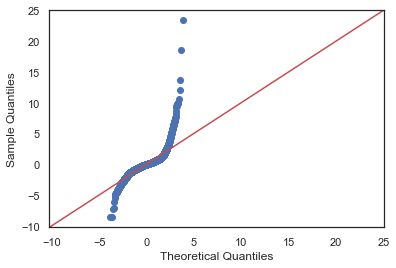

In [190]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

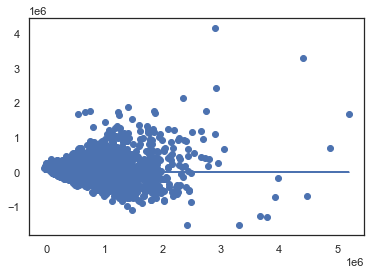

In [191]:
# Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

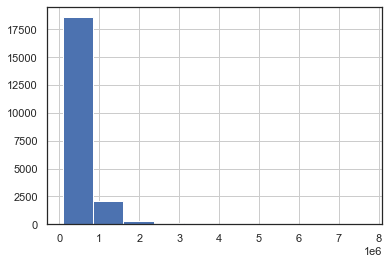

In [192]:
# From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.
#Comment: Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.
df.price.hist();

In [193]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 702000.0
0.81 percentile: 719000.0
0.82 percentile: 732000.0
0.83 percentile: 750000.0
0.84 percentile: 762000.0
0.85 percentile: 780000.0
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 838327.9999999999
0.89 percentile: 860000.0
0.9 percentile: 888999.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 997966.5000000001
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [194]:
orig_tot = len(df)
df = df[df.price < 1300000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.037377857888245894


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     672.9
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:07   Log-Likelihood:            -1.9878e+05
No. Observations:               15220   AIC:                         3.977e+05
Df Residuals:                   15152   BIC:                         3.982e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.408e+05   2252.224    151.321      0.000    3.36e+05    3.45e+05
bedrooms       1.772e+04   1181.715     14.995      0.000    1.54e+04       2e+04
bathrooms      4.961e+04   1544.029     32.132      0.000    4.66e+04    5.26e+04
sqft_lot       5.591e+04   1263.301     44.257      0.000    5.34e+04    5.84e+04
floors          3.24e+04   1412.904     22.933      0.000    2.96e+04    3.52e+04
sqft_basement    39.4934      2.888     13.677      0.000      33.833      45.153
yr_built      -8707.3422   1444.088     -6.030      0.000   -1.15e+04   -5876.756
lat            4.567e+04   1522.741     29.991      0.000    4.27e+04    4.87e+04
waterfront_10   1.67e+05   1.92e+04      8.720      0.000    1.29e+05    2.05e+05
view_10        1.045e+05   8062.821     12.959      0.000    8.87e+04     1.2e+05
view_20        8.946e+04   4775.784     18.731      0.000    8.01e+04    9.88e+04
view_30        1.436e+05   7059.434     20.340      0.000     1.3e+05    1.57e+05
view_40        2.234e+05   1.16e+04     19.317      0.000    2.01e+05    2.46e+05
grade_11       3.299e+05   9688.674     34.047      0.000    3.11e+05    3.49e+05
grade_12       2.642e+05   5.13e+04      5.148      0.000    1.64e+05    3.65e+05
grade_13       1.006e-07   2.01e-08      5.012      0.000    6.13e-08     1.4e-07
grade_4        5516.1375   2.87e+04      0.192      0.848   -5.08e+04    6.19e+04
grade_5       -3.338e+04   8819.447     -3.785      0.000   -5.07e+04   -1.61e+04
grade_9        1.113e+05   3155.190     35.282      0.000    1.05e+05    1.18e+05
zipcode_98004  4.893e+05   1.04e+04     47.195      0.000    4.69e+05     5.1e+05
zipcode_98005  2.978e+05   1.05e+04     28.334      0.000    2.77e+05    3.18e+05
zipcode_98006  2.637e+05   6579.277     40.075      0.000    2.51e+05    2.77e+05
zipcode_98007  2.073e+05   1.18e+04     17.545      0.000    1.84e+05     2.3e+05
zipcode_98008   1.75e+05   8353.942     20.945      0.000    1.59e+05    1.91e+05
zipcode_98010  6.741e+04   1.36e+04      4.956      0.000    4.08e+04    9.41e+04
zipcode_98022  1.302e+04   9872.409      1.319      0.187   -6329.068    3.24e+04
zipcode_98023  -636.6498   6570.955     -0.097      0.923   -1.35e+04    1.22e+04
zipcode_98024  1.218e+04   1.61e+04      0.759      0.448   -1.93e+04    4.37e+04
zipcode_98027  1.504e+05   7132.739     21.084      0.000    1.36e+05    1.64e+05
zipcode_98029  1.867e+05   7855.023     23.772      0.000    1.71e+05    2.02e+05
zipcode_98033  2.513e+05   7195.048     34.928      0.000    2.37e+05    2.65e+05
zipcode_98034  6.513e+04   6648.145      9.796      0.000    5.21e+04    7.82e+04
zipcode_98038   2.68e+04   6125.196      4.375      0.000    1.48e+04    3.88e+04
zipcode_98039  6.266e+05   3.81e+04     16.453      0.000    5.52e+05    7.01e+05
zipcode_98040  4.316e+05   9924.438     43.491   

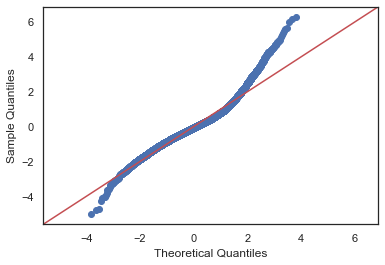

In [195]:
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

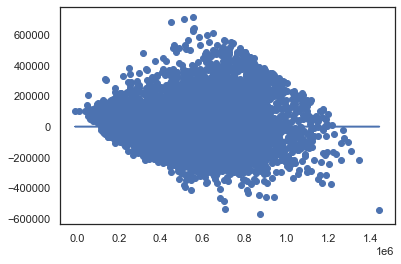

In [196]:
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 665000.0
0.81 percentile: 677000.0
0.82 percentile: 690000.0
0.83 percentile: 700000.0
0.84 percentile: 716000.0
0.85 percentile: 730000.0
0.86 percentile: 745992.8199999998
0.87 percentile: 760000.0
0.88 percentile: 775000.0
0.89 percentile: 790000.0
0.9 percentile: 809665.0000000007
0.91 percentile: 829000.0
0.92 percentile: 850000.0
0.93 percentile: 875000.0
0.94 percentile: 900000.0
0.95 percentile: 932802.8
0.96 percentile: 970000.0
0.97 percentile: 1020000.0
0.98 percentile: 1100000.0
0.99 percentile: 1200000.0


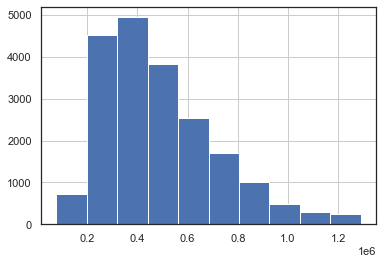

In [197]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [198]:
df = df[df.price <= 1000000]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     623.2
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:08   Log-Likelihood:            -1.9074e+05
No. Observations:               14745   AIC:                         3.816e+05
Df Residuals:                   14677   BIC:                         3.821e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.439e+05   2008.484    171.214      0.000     3.4e+05    3.48e+05
bedrooms       1.685e+04   1054.653     15.982      0.000    1.48e+04    1.89e+04
bathrooms      4.702e+04   1387.328     33.890      0.000    4.43e+04    4.97e+04
sqft_lot       5.028e+04   1126.549     44.632      0.000    4.81e+04    5.25e+04
floors         2.707e+04   1264.268     21.415      0.000    2.46e+04    2.96e+04
sqft_basement    28.7082      2.668     10.762      0.000      23.479      33.937
yr_built      -8700.5984   1300.426     -6.691      0.000   -1.12e+04   -6151.601
lat            4.615e+04   1351.126     34.157      0.000    4.35e+04    4.88e+04
waterfront_10  1.123e+05   2.08e+04      5.406      0.000    7.16e+04    1.53e+05
view_10        8.484e+04   7543.648     11.247      0.000    7.01e+04    9.96e+04
view_20        8.016e+04   4472.942     17.921      0.000    7.14e+04    8.89e+04
view_30        1.019e+05   6950.003     14.655      0.000    8.82e+04    1.15e+05
view_40         1.92e+05   1.22e+04     15.731      0.000    1.68e+05    2.16e+05
grade_11       2.675e+05   1.32e+04     20.281      0.000    2.42e+05    2.93e+05
grade_12       3.888e+05   1.01e+05      3.859      0.000    1.91e+05    5.86e+05
grade_13       2.104e-09   5.86e-10      3.592      0.000    9.56e-10    3.25e-09
grade_4       -2.967e+04   2.28e+04     -1.304      0.192   -7.43e+04    1.49e+04
grade_5        -5.69e+04   8222.062     -6.920      0.000    -7.3e+04   -4.08e+04
grade_9        1.068e+05   2900.778     36.822      0.000    1.01e+05    1.12e+05
zipcode_98004   4.48e+05   9795.126     45.735      0.000    4.29e+05    4.67e+05
zipcode_98005  2.824e+05   9688.724     29.148      0.000    2.63e+05    3.01e+05
zipcode_98006  2.487e+05   6298.830     39.484      0.000    2.36e+05    2.61e+05
zipcode_98007  1.914e+05   1.03e+04     18.594      0.000    1.71e+05    2.12e+05
zipcode_98008  1.609e+05   7623.786     21.107      0.000    1.46e+05    1.76e+05
zipcode_98010  6.144e+04   1.22e+04      5.043      0.000    3.76e+04    8.53e+04
zipcode_98022  2.703e+04   8503.846      3.178      0.001    1.04e+04    4.37e+04
zipcode_98023  2183.3649   5928.811      0.368      0.713   -9437.849    1.38e+04
zipcode_98024  3.181e+04   1.41e+04      2.259      0.024    4213.201    5.94e+04
zipcode_98027  1.562e+05   6263.523     24.942      0.000    1.44e+05    1.69e+05
zipcode_98029  1.816e+05   7007.472     25.919      0.000    1.68e+05    1.95e+05
zipcode_98033  2.131e+05   6662.823     31.980      0.000       2e+05    2.26e+05
zipcode_98034  5.628e+04   5865.670      9.594      0.000    4.48e+04    6.78e+04
zipcode_98038  2.549e+04   5387.289      4.732      0.000    1.49e+04    3.61e+04
zipcode_98039  5.627e+05   5.04e+04     11.165      0.000    4.64e+05    6.61e+05
zipcode_98040  3.928e+05      1e+04     39.146   

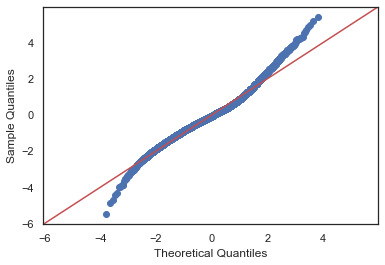

In [199]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

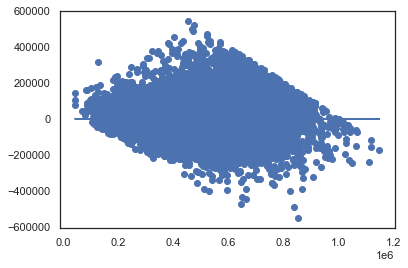

In [200]:
# Check the Homoscedasticity Assumption
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 21596
Data columns (total 98 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19660 non-null  float64
 1   bedrooms       19660 non-null  float64
 2   bathrooms      19660 non-null  float64
 3   sqft_lot       19660 non-null  float64
 4   floors         19660 non-null  float64
 5   sqft_above     19660 non-null  float64
 6   sqft_basement  19660 non-null  float64
 7   yr_built       19660 non-null  float64
 8   lat            19660 non-null  float64
 9   long           19660 non-null  float64
 10  waterfront_10  19660 non-null  uint8  
 11  view_10        19660 non-null  uint8  
 12  view_20        19660 non-null  uint8  
 13  view_30        19660 non-null  uint8  
 14  view_40        19660 non-null  uint8  
 15  condition_2    19660 non-null  uint8  
 16  condition_3    19660 non-null  uint8  
 17  condition_4    19660 non-null  uint8  
 18  condit

In [202]:
for col in df[x_cols].columns: 
    print(col) 

bedrooms
bathrooms
sqft_lot
floors
sqft_basement
yr_built
lat
waterfront_10
view_10
view_20
view_30
view_40
grade_11
grade_12
grade_13
grade_4
grade_5
grade_9
zipcode_98004
zipcode_98005
zipcode_98006
zipcode_98007
zipcode_98008
zipcode_98010
zipcode_98022
zipcode_98023
zipcode_98024
zipcode_98027
zipcode_98029
zipcode_98033
zipcode_98034
zipcode_98038
zipcode_98039
zipcode_98040
zipcode_98042
zipcode_98045
zipcode_98052
zipcode_98053
zipcode_98056
zipcode_98058
zipcode_98059
zipcode_98065
zipcode_98070
zipcode_98072
zipcode_98074
zipcode_98075
zipcode_98102
zipcode_98103
zipcode_98105
zipcode_98106
zipcode_98107
zipcode_98108
zipcode_98109
zipcode_98112
zipcode_98115
zipcode_98116
zipcode_98117
zipcode_98118
zipcode_98119
zipcode_98122
zipcode_98125
zipcode_98126
zipcode_98133
zipcode_98136
zipcode_98144
zipcode_98146
zipcode_98177
zipcode_98199


## Cross validation

In [203]:
X = df[x_cols]
y = df['price']

### Train-test split

Perform a train-test split with a test set of 20%.

In [204]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [205]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15728 3932 15728 3932


#### Fit the model

In [206]:
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

#### Residuals and MSE

In [207]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

10269257098.502876

## Cross-Validation using Scikit-Learn

In [208]:
#Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [209]:
#Next, calculate the mean of the MSE over the 5 cross-validation and compare and contrast with the result from the train-test split case.
cv_5_results.mean()

10237441137.795761

# LET'S TRY WITHOUT ZIP CODES

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 21596
Data columns (total 98 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19660 non-null  float64
 1   bedrooms       19660 non-null  float64
 2   bathrooms      19660 non-null  float64
 3   sqft_lot       19660 non-null  float64
 4   floors         19660 non-null  float64
 5   sqft_above     19660 non-null  float64
 6   sqft_basement  19660 non-null  float64
 7   yr_built       19660 non-null  float64
 8   lat            19660 non-null  float64
 9   long           19660 non-null  float64
 10  waterfront_10  19660 non-null  uint8  
 11  view_10        19660 non-null  uint8  
 12  view_20        19660 non-null  uint8  
 13  view_30        19660 non-null  uint8  
 14  view_40        19660 non-null  uint8  
 15  condition_2    19660 non-null  uint8  
 16  condition_3    19660 non-null  uint8  
 17  condition_4    19660 non-null  uint8  
 18  condit

In [211]:
# Defining the problem
outcome = 'price'
x_cols_no_zip = list(df.iloc[:, 0:29])
x_cols_no_zip.remove(outcome)

In [212]:
x_cols_no_zip

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'waterfront_10',
 'view_10',
 'view_20',
 'view_30',
 'view_40',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9']

In [213]:
train, test = train_test_split(df)

In [214]:
print(len(train), len(test))
train.head()

14745 4915


,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
10775,475000.0,2.717514,1.466293,1.451282,-0.960295,-0.161409,1350.0,-0.333982,1.116912,-122.327,...,0,0,0,0,0,0,0,0,0,0
1995,180000.0,-0.279815,-1.728568,0.073931,-0.960295,-1.118673,0.0,-1.748994,-1.850184,-122.216,...,0,0,0,0,0,0,0,0,0,0
8140,477500.0,-1.714154,0.039132,-0.322991,1.007914,0.584369,0.0,-1.818789,0.093963,-122.413,...,0,0,0,0,0,0,0,0,0,0
20942,269800.0,0.737865,0.851269,-0.946588,1.007914,0.273256,0.0,1.385426,-1.403118,-122.308,...,0,0,0,0,0,0,0,0,1,0
906,255000.0,-0.279815,-0.301407,0.164983,-0.960295,-0.337332,0.0,-0.368141,-1.179441,-122.198,...,0,0,0,0,0,0,0,0,0,0


In [215]:
test.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1530,409900.0,-0.279815,0.608204,-2.108451,1.007914,-0.337332,280.0,1.418703,-0.153414,-122.367,...,0,0,0,0,0,0,0,0,0,0
3068,985000.0,1.527239,1.466293,0.556814,1.007914,1.327089,1020.0,0.446907,1.183755,-122.284,...,0,0,0,0,0,0,0,0,0,0
3300,334000.0,-4.166173,-1.728568,-0.370205,-0.960295,-2.079843,0.0,-0.986004,0.016091,-122.394,...,0,0,0,0,0,0,0,0,0,0
10641,285000.0,-0.279815,-0.301407,0.188434,-0.960295,-0.100578,0.0,-0.129392,-1.093339,-122.210,...,0,0,0,0,0,0,0,0,0,0
6893,410500.0,-0.279815,-1.728568,-0.184139,-0.960295,-0.814671,0.0,-0.573463,1.201002,-122.339,...,0,0,0,0,0,0,0,0,0,0


In [216]:
# Fitting the actual model
predictors = '+'.join(x_cols_no_zip)
formula = outcome + '~' + predictors
model_no_zip = ols(formula=formula, data=train).fit()
model_no_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1141.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:09   Log-Likelihood:            -1.9231e+05
No. Observations:               14745   AIC:                         3.847e+05
Df Residuals:                   14717   BIC:                         3.849e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.939e+06   9.89e+05      4.997      0.000       3e+06    6.88e+06
bedrooms      -8404.5735   1250.947     -6.719      0.000   -1.09e+04   -5952.561
bathrooms       1.64e+04   1662.613      9.867      0.000    1.31e+04    1.97e+04
sqft_lot      -3558.1332   1239.581     -2.870      0.004   -5987.868   -1128.399
floors         1.146e+04   1447.896      7.915      0.000    8621.437    1.43e+04
sqft_above     6.537e+04   2090.478     31.270      0.000    6.13e+04    6.95e+04
sqft_basement    77.3122      3.148     24.562      0.000      71.143      83.482
yr_built      -4.867e+04   1407.759    -34.572      0.000   -5.14e+04   -4.59e+04
lat            7.354e+04    959.286     76.663      0.000    7.17e+04    7.54e+04
long           3.583e+04   8082.317      4.433      0.000       2e+04    5.17e+04
waterfront_10  1.317e+05   2.05e+04      6.415      0.000    9.14e+04    1.72e+05
view_10        7.709e+04   8197.426      9.404      0.000     6.1e+04    9.32e+04
view_20        6.302e+04   4946.093     12.742      0.000    5.33e+04    7.27e+04
view_30        6.925e+04   7552.094      9.169      0.000    5.44e+04    8.41e+04
view_40        1.235e+05   1.29e+04      9.567      0.000    9.82e+04    1.49e+05
condition_2    8.601e+04   2.97e+04      2.892      0.004    2.77e+04    1.44e+05
condition_3    1.051e+05   2.82e+04      3.733      0.000    4.99e+04     1.6e+05
condition_4    1.299e+05   2.82e+04      4.610      0.000    7.47e+04    1.85e+05
condition_5    1.575e+05   2.83e+04      5.564      0.000    1.02e+05    2.13e+05
grade_11       6.345e+04   1.43e+04      4.443      0.000    3.55e+04    9.14e+04
grade_12       -1.05e+04   7.95e+04     -0.132      0.895   -1.66e+05    1.45e+05
grade_13       8.884e-10   9.19e-10      0.966      0.334   -9.13e-10    2.69e-09
grade_3       -1.682e+05   1.12e+05     -1.499      0.134   -3.88e+05    5.18e+04
grade_4       -3.174e+05   2.69e+04    -11.801      0.000    -3.7e+05   -2.65e+05
grade_5       -3.438e+05   1.11e+04    -30.925      0.000   -3.66e+05   -3.22e+05
grade_6       -3.296e+05   7162.731    -46.017      0.000   -3.44e+05   -3.16e+05
grade_7       -2.722e+05   6004.350    -45.331      0.000   -2.84e+05    -2.6e+05
grade_8       -1.946e+05   5626.366    -34.583      0.000   -2.06e+05   -1.84e+05
grade_9       -7.918e+04   5766.376    -13.732      0.000   -9.05e+04   -6.79e+04
==============================================================================
Omnibus:                      979.279   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.455
Skew:                           0.532   Prob(JB):                         0.00
Kurtosis:                       4.192   Cond. No.                     1.33e+16
================================================================

In [217]:
# Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.
# Extract the p-value table from the summary and use it to subset our features (p < 0.05)
summary = model_no_zip.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols_no_zip = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols_no_zip.remove('Intercept')
print(len(p_table), len(x_cols_no_zip))
print(x_cols_no_zip[:5])
p_table.head()

29 25
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.939e+06,9.89e+05,4.997,0.000,3e+06,6.88e+06
bedrooms,-8404.5735,1250.947,-6.719,0.000,-1.09e+04,-5952.561
bathrooms,1.64e+04,1662.613,9.867,0.000,1.31e+04,1.97e+04
sqft_lot,-3558.1332,1239.581,-2.870,0.004,-5987.868,-1128.399
floors,1.146e+04,1447.896,7.915,0.000,8621.437,1.43e+04


In [218]:
# Refit model with subset features
predictors = '+'.join(x_cols_no_zip)
formula = outcome + '~' + predictors
model_no_zip = ols(formula=formula, data=train).fit()
model_no_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1232.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:10   Log-Likelihood:            -1.9231e+05
No. Observations:               14745   AIC:                         3.847e+05
Df Residuals:                   14719   BIC:                         3.849e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        4.9e+06   9.88e+05      4.959      0.000    2.96e+06    6.84e+06
bedrooms      -8372.1057   1250.693     -6.694      0.000   -1.08e+04   -5920.591
bathrooms      1.641e+04   1662.552      9.872      0.000    1.32e+04    1.97e+04
sqft_lot      -3566.4012   1239.578     -2.877      0.004   -5996.128   -1136.674
floors         1.144e+04   1447.806      7.898      0.000    8597.516    1.43e+04
sqft_above     6.548e+04   2088.460     31.355      0.000    6.14e+04    6.96e+04
sqft_basement    77.3428      3.147     24.576      0.000      71.174      83.511
yr_built      -4.862e+04   1407.311    -34.546      0.000   -5.14e+04   -4.59e+04
lat            7.359e+04    958.755     76.755      0.000    7.17e+04    7.55e+04
long           3.552e+04   8079.126      4.396      0.000    1.97e+04    5.14e+04
waterfront_10  1.318e+05   2.05e+04      6.424      0.000    9.16e+04    1.72e+05
view_10        7.709e+04   8197.480      9.404      0.000     6.1e+04    9.32e+04
view_20        6.306e+04   4946.036     12.750      0.000    5.34e+04    7.28e+04
view_30        6.928e+04   7552.118      9.173      0.000    5.45e+04    8.41e+04
view_40        1.235e+05   1.29e+04      9.589      0.000    9.82e+04    1.49e+05
condition_2    8.604e+04   2.97e+04      2.893      0.004    2.77e+04    1.44e+05
condition_3    1.051e+05   2.82e+04      3.733      0.000    4.99e+04     1.6e+05
condition_4    1.299e+05   2.82e+04      4.610      0.000    7.47e+04    1.85e+05
condition_5    1.573e+05   2.83e+04      5.559      0.000    1.02e+05    2.13e+05
grade_11       6.377e+04   1.43e+04      4.467      0.000    3.58e+04    9.17e+04
grade_4       -3.164e+05   2.69e+04    -11.768      0.000   -3.69e+05   -2.64e+05
grade_5        -3.43e+05   1.11e+04    -30.890      0.000   -3.65e+05   -3.21e+05
grade_6       -3.289e+05   7144.171    -46.031      0.000   -3.43e+05   -3.15e+05
grade_7       -2.716e+05   5987.928    -45.353      0.000   -2.83e+05    -2.6e+05
grade_8       -1.941e+05   5611.828    -34.582      0.000   -2.05e+05   -1.83e+05
grade_9       -7.877e+04   5753.611    -13.690      0.000      -9e+04   -6.75e+04
==============================================================================
Omnibus:                      977.973   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1565.569
Skew:                           0.532   Prob(JB):                         0.00
Kurtosis:                       4.190   Cond. No.                     5.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical prob

In [219]:
# Extract the p-value table from the summary and use it to subset our features
summary = model_no_zip.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols_no_zip = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols_no_zip.remove('Intercept')
print(len(p_table), len(x_cols_no_zip))
print(x_cols_no_zip[:5])
p_table.head()

26 25
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.9e+06,9.88e+05,4.959,0.000,2.96e+06,6.84e+06
bedrooms,-8372.1057,1250.693,-6.694,0.000,-1.08e+04,-5920.591
bathrooms,1.641e+04,1662.552,9.872,0.000,1.32e+04,1.97e+04
sqft_lot,-3566.4012,1239.578,-2.877,0.004,-5996.128,-1136.674
floors,1.144e+04,1447.806,7.898,0.000,8597.516,1.43e+04


In [220]:
# Refit model with subset features
predictors = '+'.join(x_cols_no_zip)
formula = outcome + "~" + predictors
model_no_zip = ols(formula=formula, data=train).fit()
model_no_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1232.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:10   Log-Likelihood:            -1.9231e+05
No. Observations:               14745   AIC:                         3.847e+05
Df Residuals:                   14719   BIC:                         3.849e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        4.9e+06   9.88e+05      4.959      0.000    2.96e+06    6.84e+06
bedrooms      -8372.1057   1250.693     -6.694      0.000   -1.08e+04   -5920.591
bathrooms      1.641e+04   1662.552      9.872      0.000    1.32e+04    1.97e+04
sqft_lot      -3566.4012   1239.578     -2.877      0.004   -5996.128   -1136.674
floors         1.144e+04   1447.806      7.898      0.000    8597.516    1.43e+04
sqft_above     6.548e+04   2088.460     31.355      0.000    6.14e+04    6.96e+04
sqft_basement    77.3428      3.147     24.576      0.000      71.174      83.511
yr_built      -4.862e+04   1407.311    -34.546      0.000   -5.14e+04   -4.59e+04
lat            7.359e+04    958.755     76.755      0.000    7.17e+04    7.55e+04
long           3.552e+04   8079.126      4.396      0.000    1.97e+04    5.14e+04
waterfront_10  1.318e+05   2.05e+04      6.424      0.000    9.16e+04    1.72e+05
view_10        7.709e+04   8197.480      9.404      0.000     6.1e+04    9.32e+04
view_20        6.306e+04   4946.036     12.750      0.000    5.34e+04    7.28e+04
view_30        6.928e+04   7552.118      9.173      0.000    5.45e+04    8.41e+04
view_40        1.235e+05   1.29e+04      9.589      0.000    9.82e+04    1.49e+05
condition_2    8.604e+04   2.97e+04      2.893      0.004    2.77e+04    1.44e+05
condition_3    1.051e+05   2.82e+04      3.733      0.000    4.99e+04     1.6e+05
condition_4    1.299e+05   2.82e+04      4.610      0.000    7.47e+04    1.85e+05
condition_5    1.573e+05   2.83e+04      5.559      0.000    1.02e+05    2.13e+05
grade_11       6.377e+04   1.43e+04      4.467      0.000    3.58e+04    9.17e+04
grade_4       -3.164e+05   2.69e+04    -11.768      0.000   -3.69e+05   -2.64e+05
grade_5        -3.43e+05   1.11e+04    -30.890      0.000   -3.65e+05   -3.21e+05
grade_6       -3.289e+05   7144.171    -46.031      0.000   -3.43e+05   -3.15e+05
grade_7       -2.716e+05   5987.928    -45.353      0.000   -2.83e+05    -2.6e+05
grade_8       -1.941e+05   5611.828    -34.582      0.000   -2.05e+05   -1.83e+05
grade_9       -7.877e+04   5753.611    -13.690      0.000      -9e+04   -6.75e+04
==============================================================================
Omnibus:                      977.973   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1565.569
Skew:                           0.532   Prob(JB):                         0.00
Kurtosis:                       4.190   Cond. No.                     5.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical prob

In [221]:
# A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.
# Inf = This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.
# need to drop one column for each categorical data is dropped to avoid a singularity occurring (action completed above)
X = df[x_cols_no_zip]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols_no_zip, vif))

[('bedrooms', 1.8342563966012697),
 ('bathrooms', 3.11292431156672),
 ('sqft_lot', 1.595211851150346),
 ('floors', 2.46969796220576),
 ('sqft_above', 4.477754266425177),
 ('sqft_basement', 2.6565766392150576),
 ('yr_built', 2.0932879753130704),
 ('lat', 1.139944620448213),
 ('long', 779.2236894483118),
 ('waterfront_10', 1.3010812870612076),
 ('view_10', 1.0296014215717593),
 ('view_20', 1.081981355514519),
 ('view_30', 1.0533354326861273),
 ('view_40', 1.3117535249478565),
 ('condition_2', 7.125997360509926),
 ('condition_3', 482.4957535372483),
 ('condition_4', 197.37787685571683),
 ('condition_5', 56.892109692479764),
 ('grade_11', 1.1338342627824554),
 ('grade_4', 1.100007048926133),
 ('grade_5', 1.6916108581927887),
 ('grade_6', 6.044720576074489),
 ('grade_7', 18.600880884344143),
 ('grade_8', 10.666140857156106),
 ('grade_9', 4.249416487338676)]

In [222]:
# Once again, subset your features based on your findings above. Then rerun the model once again.
vif_scores = list(zip(x_cols_no_zip, vif))
x_cols_no_zip = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols_no_zip))

25 17


In [223]:
# Refit model with subset features
predictors = '+'.join(x_cols_no_zip)
formula = outcome + "~" + predictors
model_no_zip = ols(formula=formula, data=train).fit()
model_no_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1389.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:10   Log-Likelihood:            -1.9358e+05
No. Observations:               14745   AIC:                         3.872e+05
Df Residuals:                   14727   BIC:                         3.873e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.353e+05   1391.345    312.898      0.000    4.33e+05    4.38e+05
bedrooms      -1.689e+04   1341.380    -12.595      0.000   -1.95e+04   -1.43e+04
bathrooms      2.434e+04   1782.582     13.653      0.000    2.08e+04    2.78e+04
sqft_lot      -1622.2309   1271.467     -1.276      0.202   -4114.465     870.003
floors         1.338e+04   1558.974      8.584      0.000    1.03e+04    1.64e+04
sqft_above     1.059e+05   2074.952     51.050      0.000    1.02e+05     1.1e+05
sqft_basement   109.1557      3.341     32.675      0.000     102.608     115.704
yr_built       -4.03e+04   1350.796    -29.837      0.000    -4.3e+04   -3.77e+04
lat            7.921e+04   1027.073     77.124      0.000    7.72e+04    8.12e+04
waterfront_10  1.166e+05   2.23e+04      5.229      0.000    7.29e+04     1.6e+05
view_10        8.346e+04   8907.955      9.369      0.000     6.6e+04    1.01e+05
view_20        7.648e+04   5371.378     14.239      0.000     6.6e+04     8.7e+04
view_30        7.852e+04   8211.422      9.562      0.000    6.24e+04    9.46e+04
view_40        1.458e+05    1.4e+04     10.406      0.000    1.18e+05    1.73e+05
grade_11       2.017e+05   1.48e+04     13.588      0.000    1.73e+05    2.31e+05
grade_4        2.049e+04   2.82e+04      0.727      0.467   -3.48e+04    7.57e+04
grade_5       -3.196e+04   9625.965     -3.320      0.001   -5.08e+04   -1.31e+04
grade_9        9.914e+04   3565.249     27.807      0.000    9.22e+04    1.06e+05
==============================================================================
Omnibus:                      781.734   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.981
Skew:                           0.494   Prob(JB):                    5.60e-237
Kurtosis:                       3.893   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

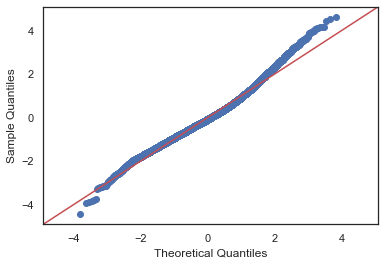

In [226]:
fig = sm.graphics.qqplot(model_no_zip.resid, dist=stats.norm, line='45', fit=True)

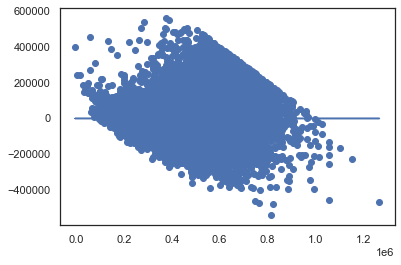

In [228]:
# Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.
plt.scatter(model_no_zip.predict(train[x_cols_no_zip]), model_no_zip.resid)
plt.plot(model_no_zip.predict(train[x_cols_no_zip]), [0 for i in range(len(train))])

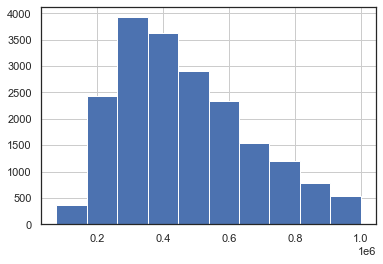

In [229]:
# From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.
#Comment: Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.
df.price.hist();

In [230]:
X = df[x_cols_no_zip]
y = df['price']

In [231]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [232]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15728 3932 15728 3932


In [233]:
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [234]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

14425951132.759354

In [235]:
#Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [236]:
#Next, calculate the mean of the MSE over the 5 cross-validation and compare and contrast with the result from the train-test split case.
cv_5_results.mean()

14921572043.771008